### Predict Diabetes from Medical Records::
#### Dataset (Pima Indians Database): (https://www.kaggle.com/uciml/pima-indians-diabetes-database)
 - Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age
 - Outcome: Normal(0) vs Diabetes(1)
 
### Simple Neural Network

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
ls

drive/  sample_data/


In [0]:
cd drive/My\ Drive

/content/drive/My Drive


In [0]:
ls

'Business Model Canvas.gdoc'  'Leftovers .gdoc'
 CITREP_Data+Code/            'Oral Presentation.gdoc'
 Classroom/                   'Quality Control.gdoc'
'Colab Notebooks'/            'Quality Control Slides.gslides'
'Getting started.pdf'


In [0]:
cd CITREP_Data+Code/

/content/drive/My Drive/CITREP_Data+Code


In [0]:
ls

 2a-TensorFlow-Data-Loading.ipynb
 2b-TensorFlow-ML.ipynb
 3a-TF-FcNN-MNIST.ipynb
 3b-TF-FcNN-MNIST-Exercise.ipynb
 3c-FcNN-CIFAR10.ipynb
 3d-FcNN-CIFAR10-Exercise.ipynb
 3-diabetic-NeuralNet-Exercise-TF.ipynb
 3e-keras-FCNN-MNIST.ipynb
 3f-keras-FcNN-dogscats.ipynb
 3g-keras-FcNN-bloodcell-Exercise.ipynb
 3h-keras-FC-AutoEncoder.ipynb
 4a-MNIST-CNN-TF.ipynb
 4b-CIFAR10-CNN-TF-Exercise.ipynb
 5a-keras-CNN-dogscats.ipynb
 5b-keras-CNN-Bloodcell.ipynb
 5c-keras-Con-AutoEncoder.ipynb
 5d-keras-Vgg16-dogscats.ipynb
 5e-Resnet50-keras-dogscats-Exercise.ipynb
 6-Semeion-Classification-SimpleCNN-Exercise.ipynb
 7-RNN-IMDB.ipynb
'CITREP+ - Clarence & Dr Sudipta - Deep Learning with Tensorflow and Python - v2.pdf'
 Data/
 mnist/
 models/
 tensorboard.ipynb


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import tensorflow as tf

import matplotlib.pyplot as plt

In [0]:
# Build model with learning rate = 0.01
# Number od epochs = 10
learning_rate = 0.01
training_epochs = 500

In [0]:
#if you don't want to transfer the file out to the same folder as the notebook, just do Data/...
df = pd.read_csv("Data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking Missing/Null Values for different Features

In [0]:
df1 = df.iloc[:, :-1]
print("\nColumn Name           % of Null Values\n")
# print((df1[:] == 0).sum())
((df1[:] == 0).sum())/768*100


Column Name           % of Null Values



Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

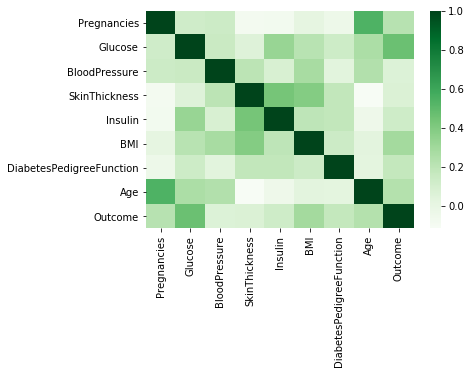

In [0]:
# this plots the correlation data between each of the parameters
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="Greens", annot = False)

#### From the correlation plot, it is clear that Features with null values (Insulin and SkinThickness) are not correlated with the outcome.
### Prepare Dataset for Training and Testing

In [0]:
# google the iloc() function
X = df.iloc[:, :-1] #everything in the dataset df except for the last column "outcome"
y = df.iloc[:, -1] # y contains only the "outcome" column
X_trainold, X_testold, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
# df.iloc[:, :-1]

In [0]:
print("X_shape:",X.shape,"Y_shape:",y.shape)
print("X_Train:",X_trainold.shape,"X_Test:", X_testold.shape)

X_shape: (768, 8) Y_shape: (768,)
X_Train: (614, 8) X_Test: (154, 8)


### Missing Values are replaced by Median

In [0]:
imputer = Imputer(missing_values=0,strategy='median')
X_train = imputer.fit_transform(X_trainold)
X_test = imputer.transform(X_testold)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
print("X_Train:",X_train.shape,"X_Test:", X_test.shape)

X_Train: (614, 8) X_Test: (154, 8)


In [0]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
print("Mean: ",mean)
print("Std: ",std)

Mean:  [  4.43973941 121.82899023  72.26221498  28.84201954 141.33224756
  32.19723127   0.46379479  33.2980456 ]
Std:  [ 2.99817272 30.47429215 12.40618104  8.5871349  87.34394387  6.81501567
  0.327095   11.80062782]


### Preparing the data
#### To deal with different scale for different features, need to do feature-wise normalization: For each feature substract the feature-mean and divide by the feature-standard_deviation. So that the feature is centered around 0 and has a unit standard deviation.

In [0]:
X_train -= mean
X_train /= std

X_test -= mean 
X_test /= std   

In [0]:
X_train.mean(axis=0)

array([7.81134115e-17, 9.40254027e-17, 4.77359737e-16, 1.44654466e-16,
       1.15723573e-17, 6.84938895e-16, 1.51887189e-16, 2.19874788e-16])

In [0]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
#preparing our levels as one hot encoding
from keras.utils import to_categorical
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [0]:
y_train1[1]

array([0., 1.], dtype=float32)

### Build the Network Model

In [0]:
# Build a FcNN model with 2 hidden layers (20 and 10 nurons respectively)
# use sigmoid as activation function

In [0]:
#-----------------------------------------------------------------------------------------MY ANSWER----------------------------------------------------------------------------------------------

In [0]:
import tensorflow as tf

# Hyper Parameters
learning_rate = 0.01
training_epochs = 500

#data boxes (boxes contain 100 random data points from the dataset) 
#based on how much ram your com has, you can increase the batch size
batch_size = 100 

tf.set_random_seed(25)

In [0]:

X = tf.placeholder(tf.float32, [None, 768*8])
y = tf.placeholder(tf.float32, [None, 2]) 

In [0]:
L1 = 20
L2 = 10

#in between the input layer 
W1 = tf.Variable(tf.truncated_normal([768*8, L1], stddev=0.1)) # 784 x 200 = 156800
B1 = tf.Variable(tf.truncated_normal([L1],stddev=0.1)) # b1 = 200 because there are 200 neurons in hidden layer 1

#in between hidden layer 1 and hideen layer 2
W2 = tf.Variable(tf.truncated_normal([L1, L2], stddev=0.1))
B2 = tf.Variable(tf.truncated_normal([L2],stddev=0.1))

#in between hidden layer 2 and the output layer
W3 = tf.Variable(tf.truncated_normal([L2, 2], stddev=0.1))
B3 = tf.Variable(tf.truncated_normal([2],stddev=0.1))


In [0]:
Y1 = tf.nn.sigmoid(tf.matmul(X, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)

Ylogits = tf.matmul(Y2, W3) + B3
yhat = tf.nn.softmax(Ylogits)

In [0]:
loss = tf.reduce_mean(
   tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=Ylogits))

train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [0]:
is_correct = tf.equal(tf.argmax(y,1),tf.argmax(yhat,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
# Step 5: Training Loop
for epoch in range(training_epochs):
  train_data = {X: batch_X, y: batch_y}
  sess.run(train, feed_dict=train_data)
  print(epoch*num_batches+i+1, "Training accuracy =", sess.run(accuracy, feed_dict=train_data),
        "Loss =", sess.run(loss, feed_dict=train_data))

In [0]:
# calculate the performance with Test data
test_data = {X:mnist.test.images,y:mnist.test.labels}
print("Testing Accuracy = ", sess.run(accuracy, feed_dict = test_data))

In [0]:
#---------------------------------------------------------------------------------------TEACHER'S ANSWERS---------------------------------------------------------------------------------

In [0]:
# Hyper Parameters
learning_rate = 0.01
training_epochs = 500

tf.set_random_seed(50)

X = tf.placeholder(tf.float32, [None, 8]) 
y = tf.placeholder(tf.float32, [None, 2])

In [0]:
L1 = 20
L2 = 10

#in between the input layer 
W1 = tf.Variable(tf.truncated_normal([8, L1], stddev=0.1)) 
B1 = tf.Variable(tf.truncated_normal([L1],stddev=0.1))

#in between hidden layer 1 and hideen layer 2
W2 = tf.Variable(tf.truncated_normal([L1, L2], stddev=0.1))
B2 = tf.Variable(tf.truncated_normal([L2],stddev=0.1))

#in between hidden layer 2 and the output layer
W3 = tf.Variable(tf.truncated_normal([L2, 2], stddev=0.1))
B3 = tf.Variable(tf.truncated_normal([2],stddev=0.1))

In [0]:
Y1 = tf.nn.sigmoid(tf.matmul(X, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)

Ylogits = tf.matmul(Y2, W3) + B3
yhat = tf.nn.softmax(Ylogits)

In [0]:
loss = tf.reduce_mean(
   tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=Ylogits))

train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [0]:
is_correct = tf.equal(tf.argmax(y,1),tf.argmax(yhat,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
# Step 5: Training Loop
for epoch in range(training_epochs):
  train_data = {X: X_train, y: y_train1}
  sess.run(train, feed_dict=train_data)
  print(epoch, "Training accuracy =", sess.run(accuracy, feed_dict=train_data),
        "Loss =", sess.run(loss, feed_dict=train_data))

0 Training accuracy = 0.6530945 Loss = 0.6495516
1 Training accuracy = 0.6530945 Loss = 0.6448405
2 Training accuracy = 0.6530945 Loss = 0.64463186
3 Training accuracy = 0.6530945 Loss = 0.64607024
4 Training accuracy = 0.6530945 Loss = 0.6463362
5 Training accuracy = 0.6530945 Loss = 0.6448942
6 Training accuracy = 0.6530945 Loss = 0.64255667
7 Training accuracy = 0.6530945 Loss = 0.64023095
8 Training accuracy = 0.6530945 Loss = 0.6384355
9 Training accuracy = 0.6530945 Loss = 0.63721484
10 Training accuracy = 0.6530945 Loss = 0.6362623
11 Training accuracy = 0.6530945 Loss = 0.6351488
12 Training accuracy = 0.6530945 Loss = 0.63354
13 Training accuracy = 0.6530945 Loss = 0.6313098
14 Training accuracy = 0.6530945 Loss = 0.62852764
15 Training accuracy = 0.6530945 Loss = 0.6253718
16 Training accuracy = 0.6530945 Loss = 0.62202835
17 Training accuracy = 0.6530945 Loss = 0.6186121
18 Training accuracy = 0.6530945 Loss = 0.61513126
19 Training accuracy = 0.6530945 Loss = 0.6115012
20 T

In [0]:
# Step 6: Evaluation
test_data = {X: X_test, y: y_test1}
print("Testing Accuracy = ", sess.run(accuracy, feed_dict = test_data))

Testing Accuracy =  0.7012987
